In [1]:
import matplotlib.pyplot as plt
import glob
import pickle
import re
from collections import defaultdict
import pandas as pd
import seaborn as sns
from utils import *

/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)


In [2]:
def re_find(patern, text):
    p = re.compile(patern)
    result = p.search(text)
    return result.group(1)

In [3]:
data = defaultdict(lambda: [])

files = glob.glob('trained_model/feature_compare/*/meta.p')
for file in files:
    meta = pickle.load(open(file, "rb"))
    algo = re_find('m_(.+?)_f_', file)
    features = re_find('f_(.+?)_r_', file)
    run = re_find('_r_(.+?)_c_', file)
    cor = re_find('c_(.+?)/', file)
    
    data['Model'].append(algo)
    data['Features'].append(features)
    
    data['Run'].append(run)
    data['FeatureCorrelation'].append(cor)
    
    data['Error'].append(meta['error'])

df = pd.DataFrame(dict(data))
df

,Model,Features,Run,FeatureCorrelation,Error
0,M4DummyMeanRegression,Catch22,7,0.95,0.120299
1,M4DummyMeanRegression,Catch22,1,0.8,0.117260
2,M4DummyMedianRegression,Catch22,4,0.8,0.106481
3,M4DummyMedianRegression,Catch22,5,1.0,0.106049
4,M4MLPRegressorLarge,Catch22,17,0.5,0.094144
...,...,...,...,...,...
489,M4MLPRegressor,Catch22,7,0.6,0.092553
490,M4DummyMedianRegression,Catch22,1,1.0,0.103386
491,M4DummyMeanRegression,Catch22,8,0.6,0.118621
492,M4DummyMeanRegression,Catch22,10,0.9,0.117107


In [4]:
figures_directory = 'figures'
create_directory_if_not_exist(figures_directory)
fig_x_lim = [0, 0.15]

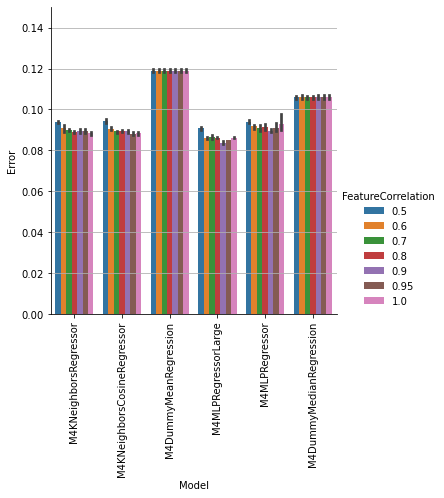

In [5]:
sns.catplot(x = "Model",
            y = "Error",
            hue = "FeatureCorrelation",
            data = df[(df['Features']=='Catch22')].sort_values('FeatureCorrelation'),
            kind = "bar")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.ylim(fig_x_lim)
plt.savefig(f'{figures_directory}/performance_Catch22.pdf', bbox_inches='tight', pad_inches=0)

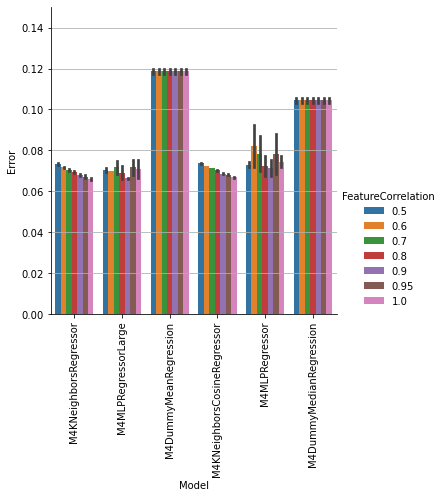

In [6]:
sns.catplot(x = "Model",
            y = "Error",
            hue = "FeatureCorrelation",
            data = df[(df['Features']=='TSFresh')].sort_values('FeatureCorrelation'),
            kind = "bar")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.ylim(fig_x_lim)
plt.savefig(f'{figures_directory}/performance_TSFresh.pdf', bbox_inches='tight', pad_inches=0)

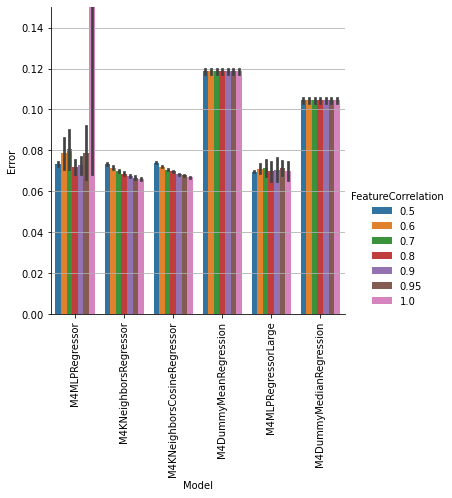

In [7]:
sns.catplot(x = "Model",
            y = "Error",
            hue = "FeatureCorrelation",
            data = df[(df['Features']=='TSFresh,Catch22')].sort_values('FeatureCorrelation'),
            kind = "bar")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.ylim(fig_x_lim)
plt.savefig(f'{figures_directory}/performance_TSFresh,Catch22.pdf', bbox_inches='tight', pad_inches=0)

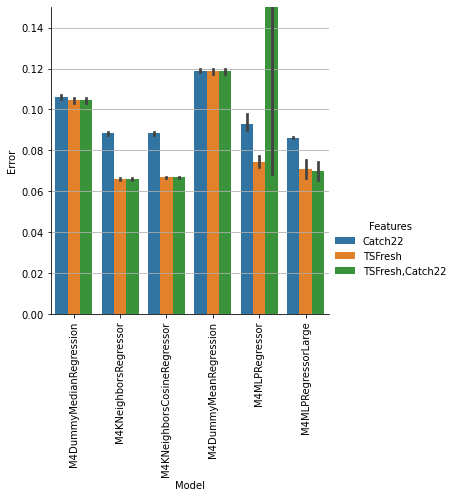

In [8]:
sns.catplot(x = "Model",
            y = "Error",
            hue = "Features",
            data = df[(df['FeatureCorrelation']=='1.0')],
            kind = "bar")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.ylim(fig_x_lim)
plt.savefig(f'{figures_directory}/performance_FeatureCorrelation_1_0.pdf', bbox_inches='tight', pad_inches=0)